In [ ]:
### Code contains analysis for pathway enrichment analysis with sets of genes in clusters of upregulated DGEs in old vs young mice at day 37 sand the code for generating temporal gene expression heatmaps of the identified clusters shown in Figure 2 

In [1]:
import pandas as pd
import gseapy 
import diffxpy.api as de
import warnings
import os
warnings.filterwarnings("ignore")

2024-09-18 16:30:27.402348: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:30:27.404858: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:30:27.411533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1726669827.421927 3283456 cuda_dnn.cc:8430] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1726669827.425094 3283456 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 16:30:27.434059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
import rpy2
%load_ext rpy2.ipython

In [5]:
print(gseapy.__version__)

1.1.3


In [5]:
%%R
library(ggplot2)
library(gdata)
library(tidyr)
library(pheatmap)
library(tibble)
library(openxlsx)
library(clusterSim)
library(viridis)
library(dichromat)


Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘tidyr’

The following object is masked from ‘package:gdata’:

    starts_with

Loading required package: cluster
Loading required package: MASS
Loading required package: viridisLite
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


### Pseudobulk d37 DGEs

In [32]:
logfc = "025"
ncluster = "9"
age = "old"

In [34]:
c1_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_1_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c2_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_2_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c3_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_3_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c4_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_4_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c5_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_5_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c6_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_6_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c7_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_7_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c8_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_8_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c9_genes = pd.read_csv(f"/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_9_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)

c1_genes = c1_genes[0].values.tolist()
c2_genes = c2_genes[0].values.tolist() 
c3_genes = c3_genes[0].values.tolist() 
c4_genes = c4_genes[0].values.tolist() 
c5_genes = c5_genes[0].values.tolist() 
c6_genes = c6_genes[0].values.tolist() 
c7_genes = c7_genes[0].values.tolist() 
c8_genes = c8_genes[0].values.tolist() 
c9_genes = c9_genes[0].values.tolist()

In [37]:
import os
output_dir = "/home/davidlauer/data/LungAging/data/Splines_clustering/gsea_results_dge_d37/"
cluster = 9

for item in [c1_genes, c2_genes, c3_genes, c4_genes, c5_genes, c6_genes, c7_genes, c8_genes, c9_genes]:           
    enr_res = gseapy.enrichr(gene_list = item,
                     organism = 'Mouse',
                     gene_sets = ['GO_Biological_Process_2023', 'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse'],
                     cutoff = 1, no_plot = True,
                     outdir = output_dir)
    
    tab_reactome = pd.read_csv(output_dir + "Reactome_2022.Mouse.enrichr.reports.txt", sep = "\t")
    
    tab_gobp = pd.read_csv(output_dir + "GO_Biological_Process_2023.Mouse.enrichr.reports.txt", sep = "\t")
    
    tab_kegg = pd.read_csv(output_dir + "KEGG_2019_Mouse.Mouse.enrichr.reports.txt", sep = "\t")

    tab_msigdb = pd.read_csv(output_dir + "MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt", sep = "\t")

    tab_all = pd.concat([tab_reactome, tab_gobp, tab_msigdb, tab_kegg])
    tab_all = tab_all.loc[tab_all["Adjusted P-value"] <= 0.05]
    tab_all = tab_all.sort_values("Adjusted P-value")
    
    cluster = cluster + 1
    filename = f'/home/davidlauer/data/LungAging/data/Splines_clustering/gsea_results_dge_d37/gsea_tables/cluster_{cluster}_gsea_results_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_pseudobulk_d37_dge_set_zscore_all_pseudobulk.csv'
    tab_all.to_csv(filename, header = True, index = False, encoding = "utf-8")
    try:
        os.remove(output_dir + "Reactome_2022.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "GO_Biological_Process_2023.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "KEGG_2019_Mouse.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    

### Heatmap for Pathway Enrichment

In [13]:
%%R
gsea_res <- read.xlsx("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_summary_gsea_results_qval_logfc025_ncluster9_old_mice_pseudobulk_d37_dge_set_zscore_all_pseudobulk.xlsx", sheet = 1)
gsea_msig <- subset(gsea_res, gene_set %in% c("MSigDB_Hallmark_2020"))
gsea_go <- subset(gsea_res, gene_set %in% c("GO_Biological_Process_2023"))

In [14]:
%%R
gsea_msig_mat <- gsea_msig[, c("term", "cluster", "pval_adj")]
gsea_msig_mat <- pivot_wider(gsea_msig_mat, names_from = term, values_from = pval_adj)
gsea_msig_mat <- as.data.frame(gsea_msig_mat)
rownames(gsea_msig_mat) <- gsea_msig_mat$cluster
gsea_msig_mat <- gsea_msig_mat[,-1]
gsea_msig_mat <- -log10(t(gsea_msig_mat))
gsea_msig_mat[is.na(gsea_msig_mat)] <- 0
gsea_msig_mat <- as.data.frame(gsea_msig_mat)
gsea_msig_mat$C9 <- 0
#head(gsea_msig_mat)



Saving 6.67 x 6.67 in image


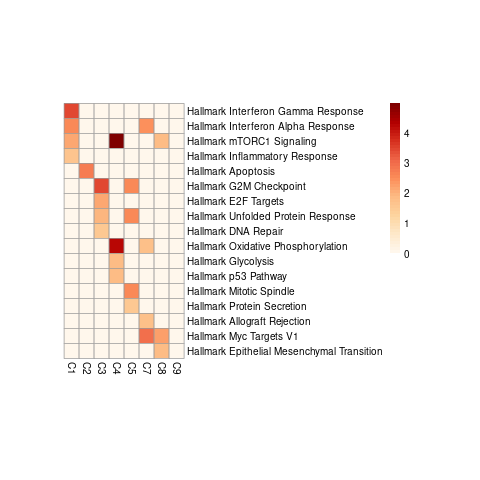

In [9]:
%%R
plt <- pheatmap(gsea_msig_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/msigdb_heatmap_all_clusters.pdf")

In [20]:
%%R
gsea_go_mat <- gsea_go[, c("term", "cluster", "pval_adj")]
gsea_go_mat <- pivot_wider(gsea_go_mat, names_from = term, values_from = pval_adj)
gsea_go_mat <- as.data.frame(gsea_go_mat)
rownames(gsea_go_mat) <- gsea_go_mat$cluster
gsea_go_mat <- gsea_go_mat[,-1]
gsea_go_mat <- -log10(t(gsea_go_mat))
gsea_go_mat[is.na(gsea_go_mat)] <- 0
gsea_go_mat <- as.data.frame(gsea_go_mat)

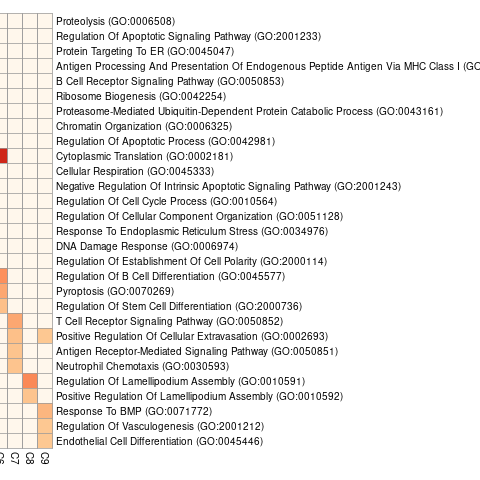

In [21]:
%%R
plt <- pheatmap(gsea_go_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/go_heatmap_all_clusters.pdf",
      width = 12, height = 12)

In [16]:
%%R
gsea_all_mat <- gsea_res[, c("term", "cluster", "pval_adj")]
gsea_all_mat <- pivot_wider(gsea_all_mat, names_from = term, values_from = pval_adj)
gsea_all_mat <- as.data.frame(gsea_all_mat)
rownames(gsea_all_mat) <- gsea_all_mat$cluster
gsea_all_mat <- gsea_all_mat[,-1]
gsea_all_mat <- -log10(t(gsea_all_mat))
gsea_all_mat[is.na(gsea_all_mat)] <- 0
gsea_all_mat <- as.data.frame(gsea_all_mat)
gsea_all_mat

                                                                                                     C1
Proteolysis (GO:0006508)                                                                       3.949848
Regulation Of Apoptotic Signaling Pathway (GO:2001233)                                         1.848708
Protein Targeting To ER (GO:0045047)                                                           1.638897
Antigen Processing And Presentation Of Endogenous Peptide Antigen Via MHC Class I (GO:0019885) 1.438793
Hallmark Interferon Gamma Response                                                             3.481136
Hallmark Interferon Alpha Response                                                             2.582031
Hallmark mTORC1 Signaling                                                                      2.147522
Hallmark Inflammatory Response                                                                 1.645135
B Cell Receptor Signaling Pathway (GO:0050853)                  

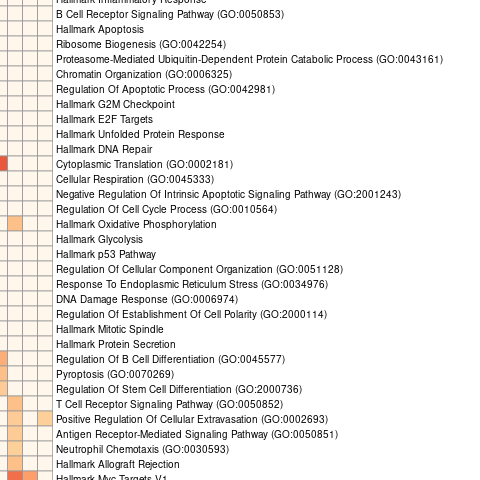

In [11]:
%%R
plt <- pheatmap(gsea_all_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/go_and_msigdb_heatmap_all_clusters.pdf",
      width = 12, height = 12)

### Heatmap Pseudobulk with d37 DGEs

In [20]:
%%R
logfc = "025"
ncluster = "9"
age = "old"
compartment = "pseudobulk"

c1_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_1_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c2_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_2_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c3_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_3_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c4_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_4_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c5_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_5_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c6_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_6_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c7_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_7_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c8_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_8_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)
c9_genes = read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_9_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), sep = "\t", header = FALSE)

c1_genes <- c1_genes[,1]
c2_genes <- c2_genes[,1]
c3_genes <- c3_genes[,1]
c4_genes <- c4_genes[,1]
c5_genes <- c5_genes[,1]
c6_genes <- c6_genes[,1]
c7_genes <- c7_genes[,1]
c9_genes <- c9_genes[,1]

In [21]:
%%R
pseudobulk_exp = read.csv("/home/davidlauer/data/LungAging/data/Splines_clustering/mean_expression_pseudobulk.csv",
                            row.names = 1)

pseudobulk_exp_old <- pseudobulk_exp[,7:12]
colnames(pseudobulk_exp_old) <- gsub("old_", "", colnames(pseudobulk_exp_old))

pseudobulk_exp_young <- pseudobulk_exp[,1:6]
colnames(pseudobulk_exp_young) <- gsub("young_", "", colnames(pseudobulk_exp_young))

head(pseudobulk_exp)

                  young_d0     young_d3    young_d10   young_d20    young_d30
0610005C13Rik 0.0004096108 0.0004425363 8.499916e-05 0.000417581 0.0001669096
0610009B22Rik 0.0054764547 0.0072335075 8.342048e-03 0.005473794 0.0073496680
0610009E02Rik 0.0019553886 0.0016353056 2.050692e-03 0.001394189 0.0028642747
0610009L18Rik 0.0039646410 0.0036877699 2.187992e-03 0.003763148 0.0018280994
0610010F05Rik 0.0236682630 0.0200612950 2.563014e-02 0.029140440 0.0292729050
0610010K14Rik 0.0029571240 0.0039616465 3.529876e-03 0.002945689 0.0032201582
                 young_d37      old_d0       old_d3      old_d10      old_d20
0610005C13Rik 0.0011192921 0.000506839 0.0005162548 0.0002106806 0.0004420795
0610009B22Rik 0.0031431166 0.005796074 0.0074475952 0.0100747190 0.0105922595
0610009E02Rik 0.0004456969 0.001488336 0.0022858190 0.0025060126 0.0014094330
0610009L18Rik 0.0011766149 0.004547974 0.0031714860 0.0027202263 0.0039562110
0610010F05Rik 0.0225881300 0.017539360 0.0162972880 0.0197559130

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


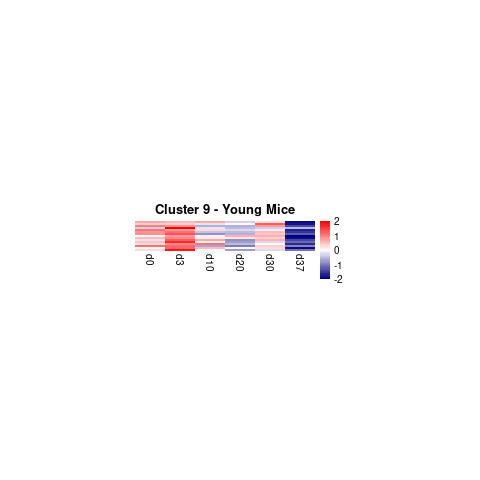

In [22]:
%%R
logfc = "025"
age = "old"
compartment = "pseudobulk_d37_dge"
output = "/home/davidlauer/data/LungAging/data/Splines_clustering/cluster_heatmaps/"

ncluster = "9"
cluster = 9

for (i in 1:cluster){
    cluster_genes <- read.csv(paste0("/home/davidlauer/data/LungAging/data/Splines_clustering/gene_clusters_dge_d37/cluster_", i, "_qval_logfc", logfc, "_ncluster", ncluster, "_", age, "_mice_d37_dge_set_zscore_pseudobulk.txt"), 
                              sep = "\t", header = FALSE)
    cluster_genes <- cluster_genes[,1]

    old_mice <- as.data.frame(pseudobulk_exp_old[cluster_genes, ])
    old_mice <- apply(data.frame(old_mice), 1, scale)
    rownames(old_mice) <- c("d0", "d3", "d10", "d20", "d30", "d37")
    old_mice <- t(old_mice)

    plt_old <- pheatmap(mat = old_mice,
                        main = paste0("Cluster ", i, " - Old Mice"),
                        color = colorRampPalette(rev(brewer.pal(11, "RdBu")))(50),
                        breaks = seq(-2, 2, by = 0.08),
                        cellheight = 2,
                        cellwidth = 30,
                        cluster_cols = FALSE,
                        cluster_rows = FALSE,
                        show_rownames = FALSE)
    filename_old = paste0(output, "cluster_", i, "_old_mice" ,"_gene_expression_heatmap_logfc", logfc, "_dropNA_", compartment, "_", age, "_mice_ncluster", ncluster, ".pdf")
    ggsave(filename = filename_old, plot = plt_old, scale = 1)

    young_mice <- as.data.frame(pseudobulk_exp_young[cluster_genes, ])
    young_mice <- apply(data.frame(young_mice), 1, scale)
    rownames(young_mice) <- c("d0", "d3", "d10", "d20", "d30", "d37")
    young_mice <- t(young_mice)

    plt_old <- pheatmap(mat = young_mice,
                        main = paste0("Cluster ", i, " - Young Mice"),
                        color = colorRampPalette(rev(brewer.pal(11, "RdBu")))(50),
                        breaks = seq(-2, 2, by = 0.08),
                        cellheight = 2,
                        cellwidth = 30,
                        cluster_cols = FALSE,
                        cluster_rows = FALSE,
                        show_rownames = FALSE)
    filename_young = paste0(output, "cluster_", i, "_young_mice" ,"_gene_expression_heatmap_logfc", logfc, "_dropNA_", compartment, "_", age, "_mice_ncluster", ncluster, ".pdf")
    ggsave(filename = filename_young, plot = plt_old, scale = 1)

    
}

